In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
ed1 = pd.read_csv("bankmarketing.csv")
import warnings
warnings.filterwarnings('ignore')

In [2]:
ed1.shape

(41188, 21)

In [3]:
ed1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
ed1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
ed1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
ed1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


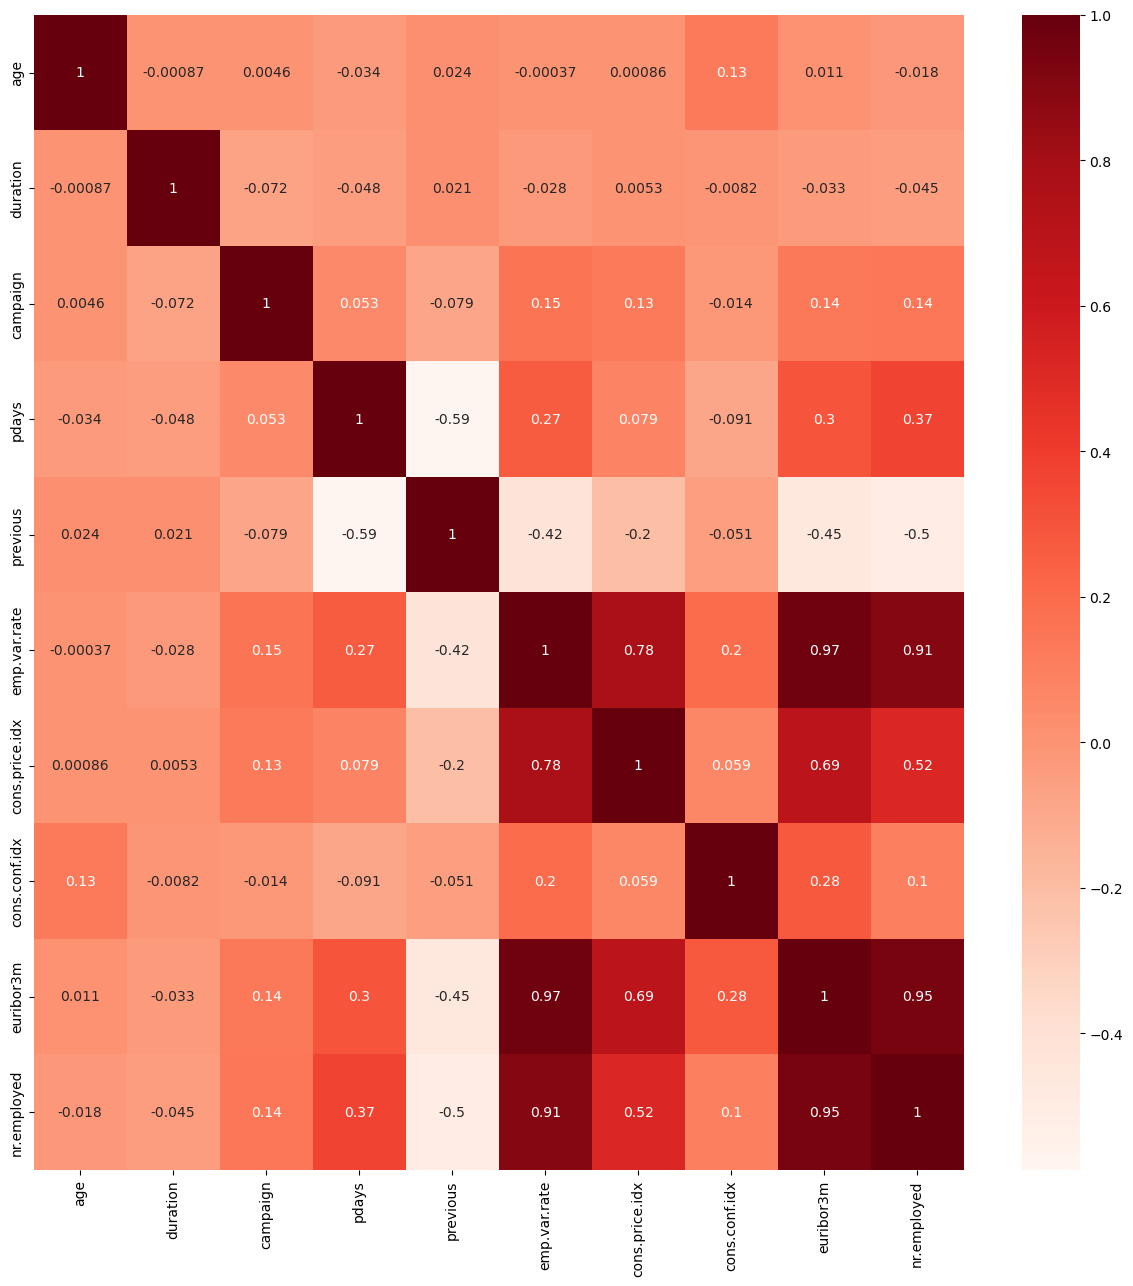

In [7]:
plt.figure(figsize=(15,15))
cor = ed1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
bc = ed1[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [9]:
bc.head

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mont

<AxesSubplot:>

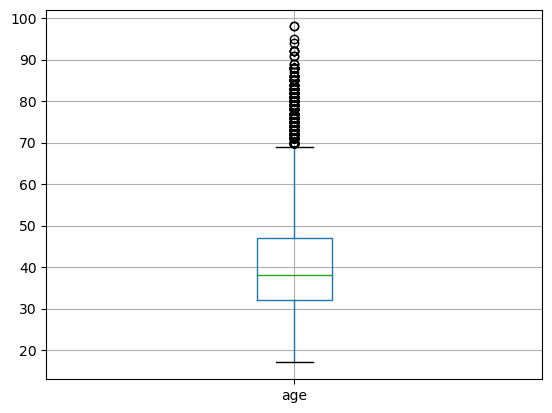

In [10]:
bc[["age"]].boxplot()

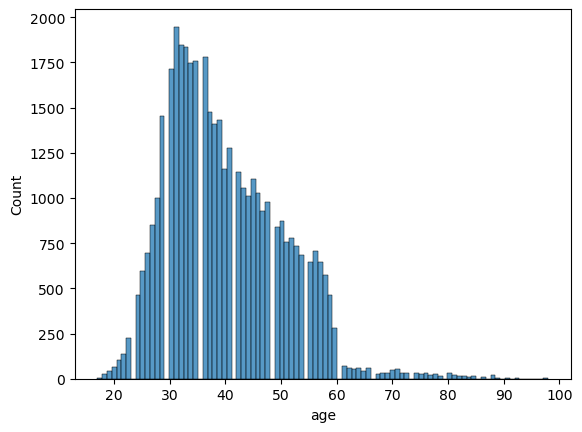

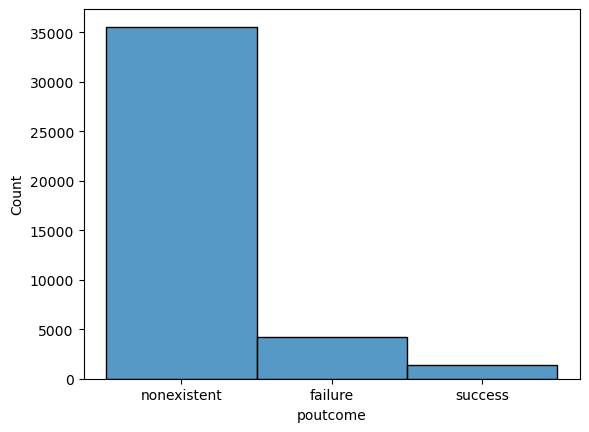

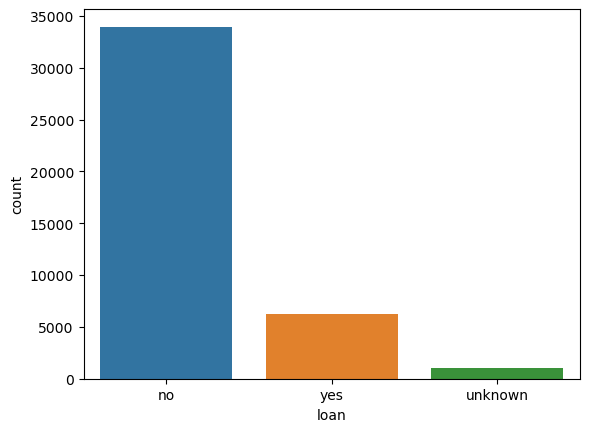

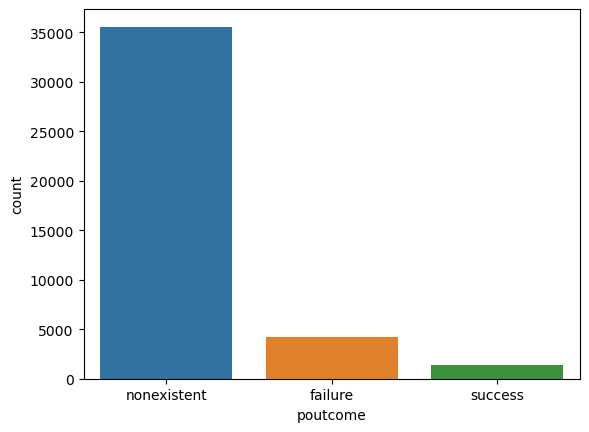

In [11]:
num_col = bc[['age', 'poutcome']]
cat_col = bc[['loan','poutcome']]

for i in num_col:
  plt.figure()
  sns.histplot(data=num_col, x=i)

    
for i in cat_col:
  plt.figure()
  sns.countplot(data=cat_col, x=i)

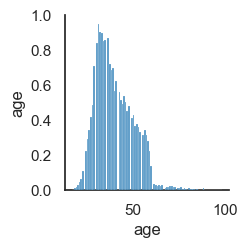

In [12]:
sns.set_context('notebook')
sns.set_style('white')
fig = sns.pairplot(bc)

fig.savefig("pairplot1.png")

In [13]:
bc['age_range'] = pd.cut(bc['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bc  = bc.drop('age',axis = 1)

In [14]:
bc.isnull().sum()*100/bc.shape[0]

job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
poutcome       0.0
age_range      0.0
dtype: float64

In [15]:
bc.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_range
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [16]:
bcc=bc.copy()

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bc = bc.apply(le.fit_transform)
bc.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_range
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
bc_ss=ss.fit_transform(bc)
X_normalized = normalize(bc_ss)
X_normalized = pd.DataFrame(X_normalized)

# K-MODES CLUSTERING

In [ ]:
pip install kmodes

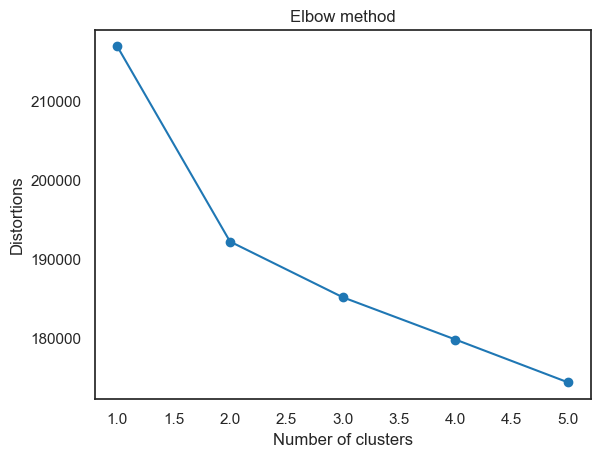

In [19]:
from kmodes.kmodes import KModes
distortions = []
for i in range(1,6):
    kmodes = KModes(n_clusters=i,init='Cao', n_init=5, verbose=0)
    kmodes.fit(bc)
    distortions.append(kmodes.cost_)

plt.plot(range(1,6), distortions, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

In [20]:
from kmodes.kmodes import KModes
kmodes = KModes(n_clusters=2, random_state=75)
fit_cluster = kmodes.fit_predict(bc)
df_cluster = bc.copy()
df_cluster['Cluster'] = fit_cluster
# Display the data
df_cluster.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_range,Cluster
0,3,1,0,0,0,0,1,6,1,1,4,1
1,7,1,3,1,0,0,1,6,1,1,4,1
2,7,1,3,0,2,0,1,6,1,1,2,0
3,0,1,1,0,0,0,1,6,1,1,2,0
4,7,1,3,0,0,2,1,6,1,1,4,1


In [21]:
df_cluster["Cluster"].value_counts()

0    28293
1    12895
Name: Cluster, dtype: int64

In [22]:
c=df_cluster["Cluster"] 
kmodes_silhouette = silhouette_score(df_cluster,c)
print(kmodes_silhouette)

0.03144142275337984


# GAUSSIAN MIXTURE MODEL CLUSTERING

In [23]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

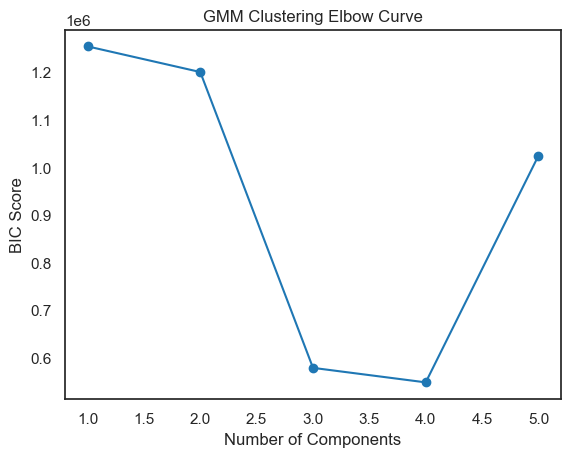

In [24]:
n_components_range = range(1,6)

# calculate BIC scores for each number of components
bic_scores = []
for n in n_components_range:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(bc)
    bic_scores.append(gmm.bic(bc))

# plot elbow curve
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('GMM Clustering Elbow Curve')
plt.show()

In [25]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(bc)

GaussianMixture(n_components=2)

In [26]:
yhat = gmm.predict(bc)

In [27]:
clusters = unique(yhat)

In [28]:
df_cluster['gmm'] = yhat

In [29]:
df_cluster.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_range,Cluster,gmm
0,3,1,0,0,0,0,1,6,1,1,4,1,1
1,7,1,3,1,0,0,1,6,1,1,4,1,1
2,7,1,3,0,2,0,1,6,1,1,2,0,1
3,0,1,1,0,0,0,1,6,1,1,2,0,0
4,7,1,3,0,0,2,1,6,1,1,4,1,1


In [30]:
df_cluster["gmm"].value_counts()

1    21817
0    19371
Name: gmm, dtype: int64

In [31]:
a=df_cluster["gmm"]
gmm_silhouette = silhouette_score(df_cluster,a)
print(gmm_silhouette)

0.29639185064820284


# HIERARCHIAL AGGLOMERATIVE CLUSTERING 

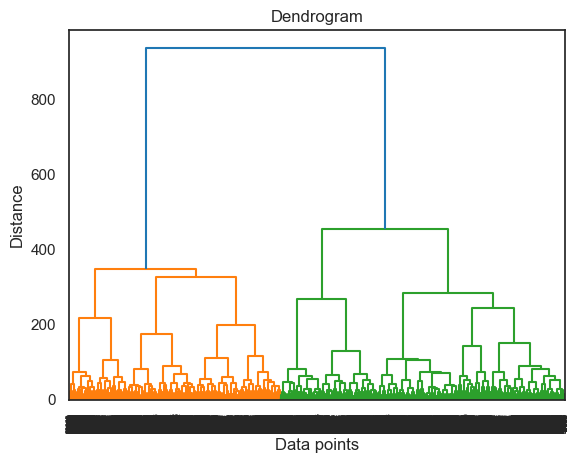

In [32]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(bc, 'ward')
dendrogram(linkage_matrix)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [34]:
#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True, affinity='euclidean')
model_ac = ac.fit(bc)
df_cluster['AC_label'] = model_ac.fit_predict(bc)

In [35]:
df_cluster["AC_label"].value_counts()

0    23616
1    17572
Name: AC_label, dtype: int64

In [36]:
df_cluster.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_range,Cluster,gmm,AC_label
0,3,1,0,0,0,0,1,6,1,1,4,1,1,0
1,7,1,3,1,0,0,1,6,1,1,4,1,1,1
2,7,1,3,0,2,0,1,6,1,1,2,0,1,1
3,0,1,1,0,0,0,1,6,1,1,2,0,0,0
4,7,1,3,0,0,2,1,6,1,1,4,1,1,1


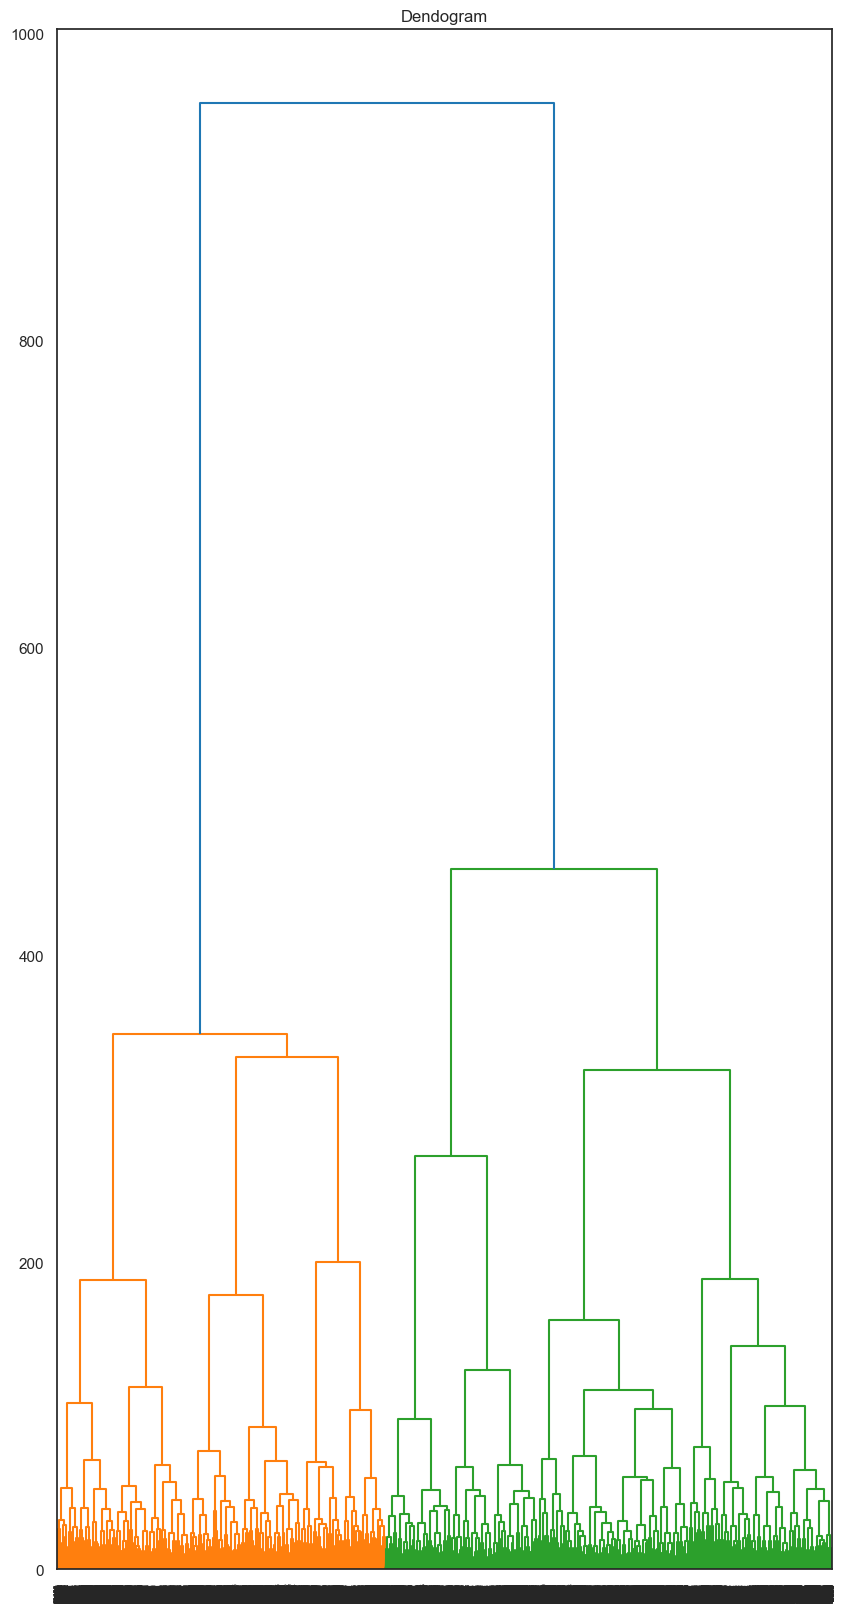

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize =(10,20))
plt.title('Dendogram')
linkage_method = linkage(df_cluster, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method)

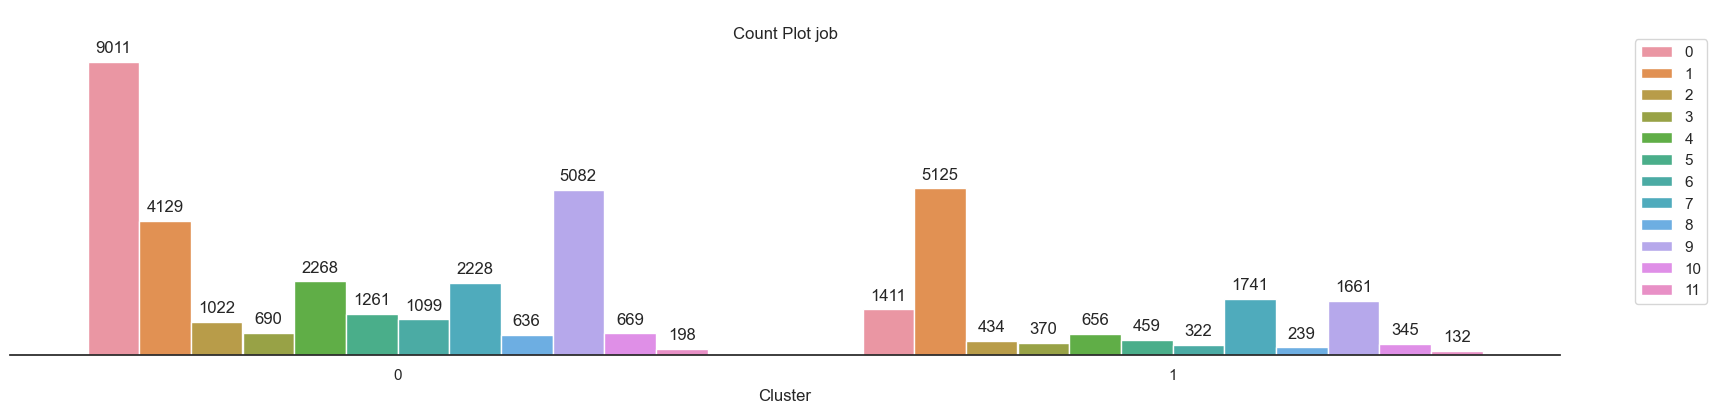

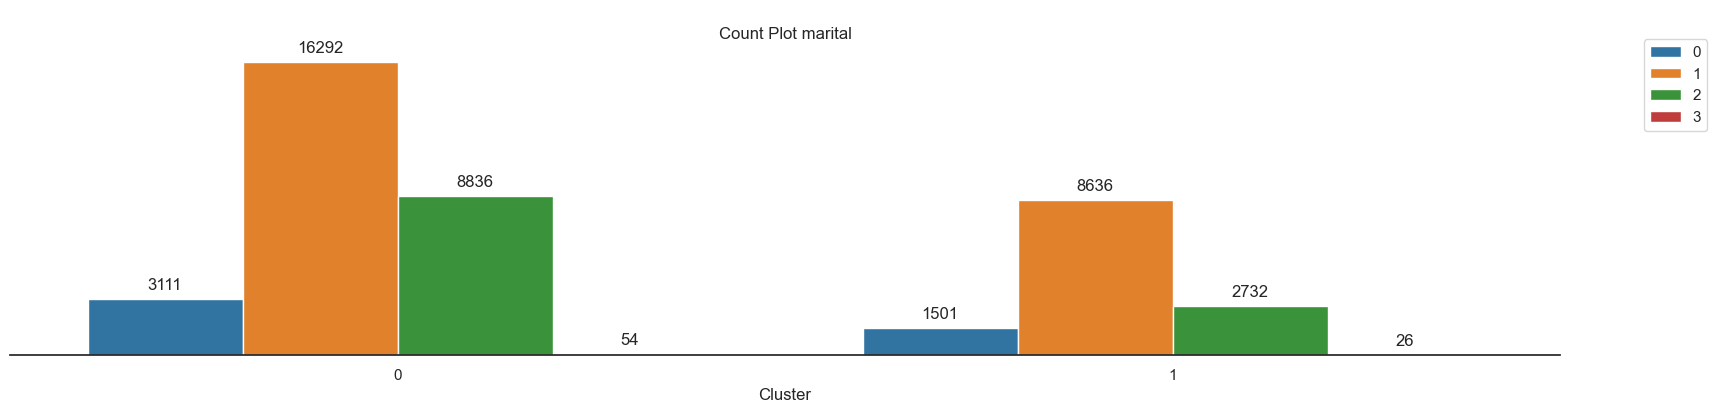

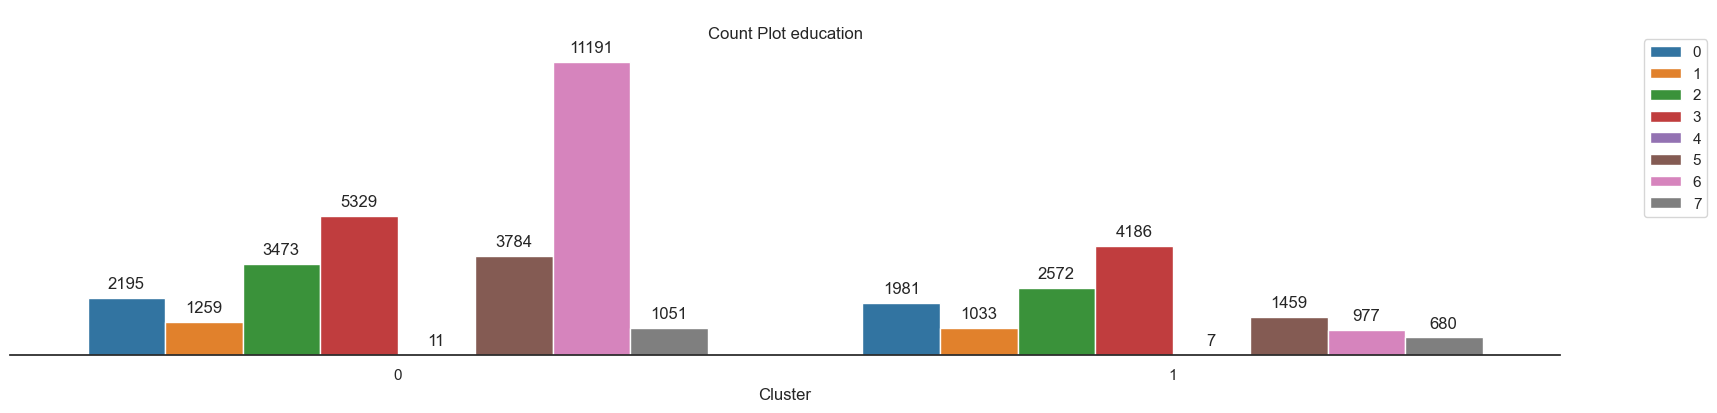

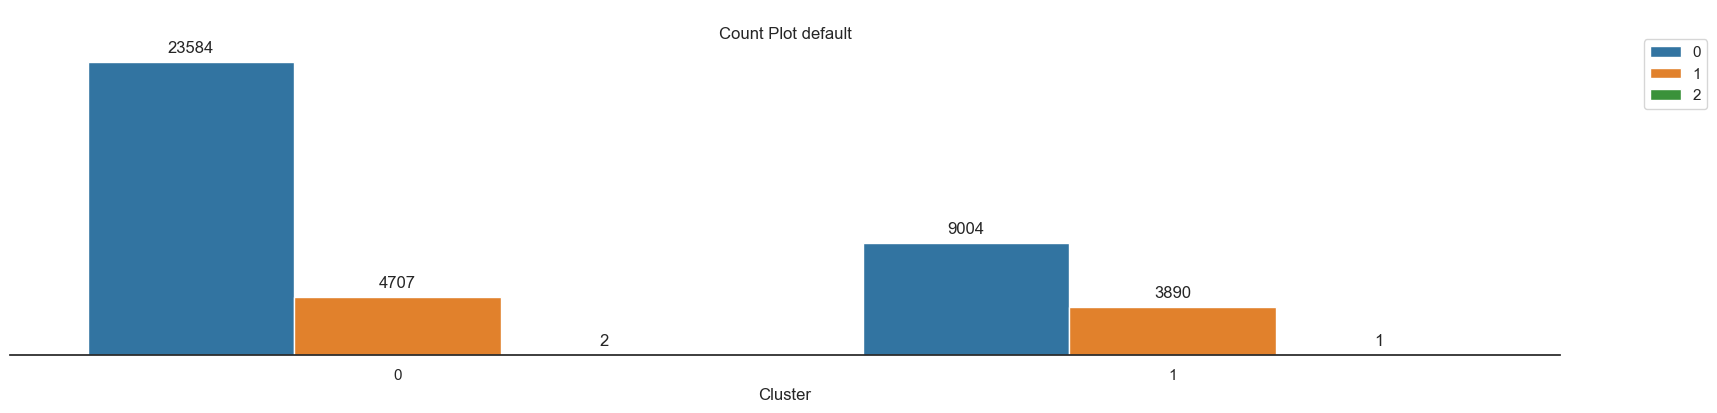

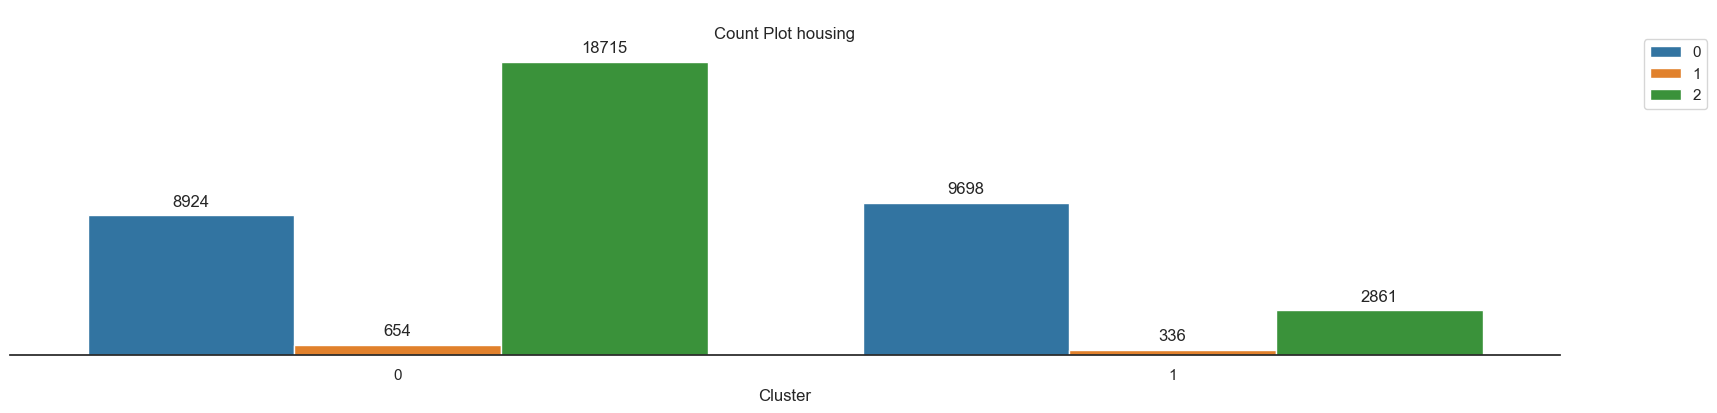

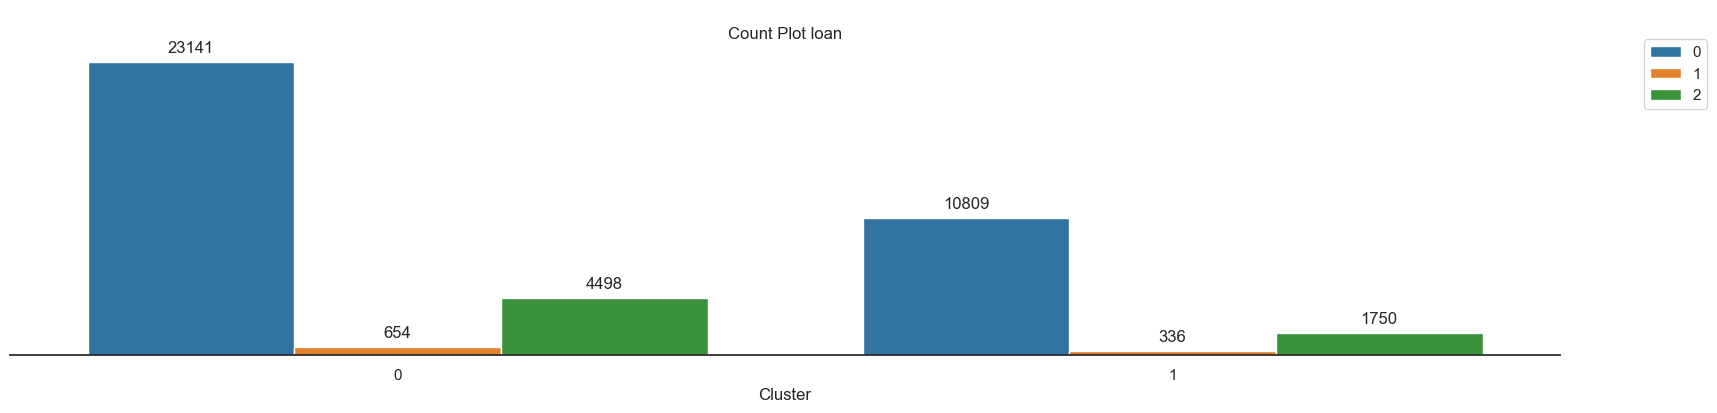

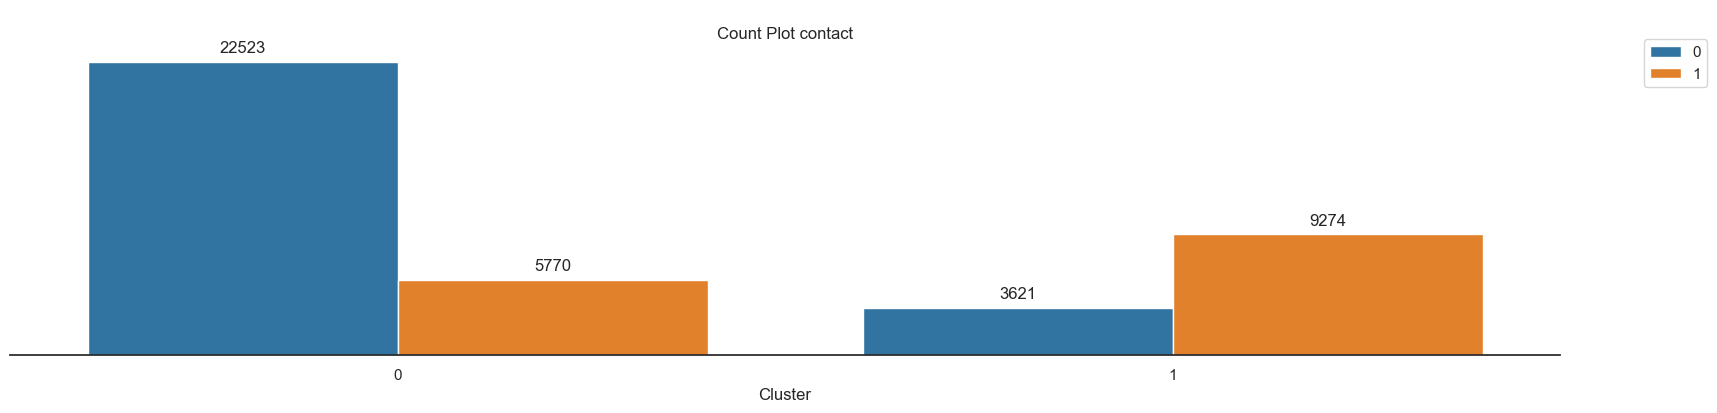

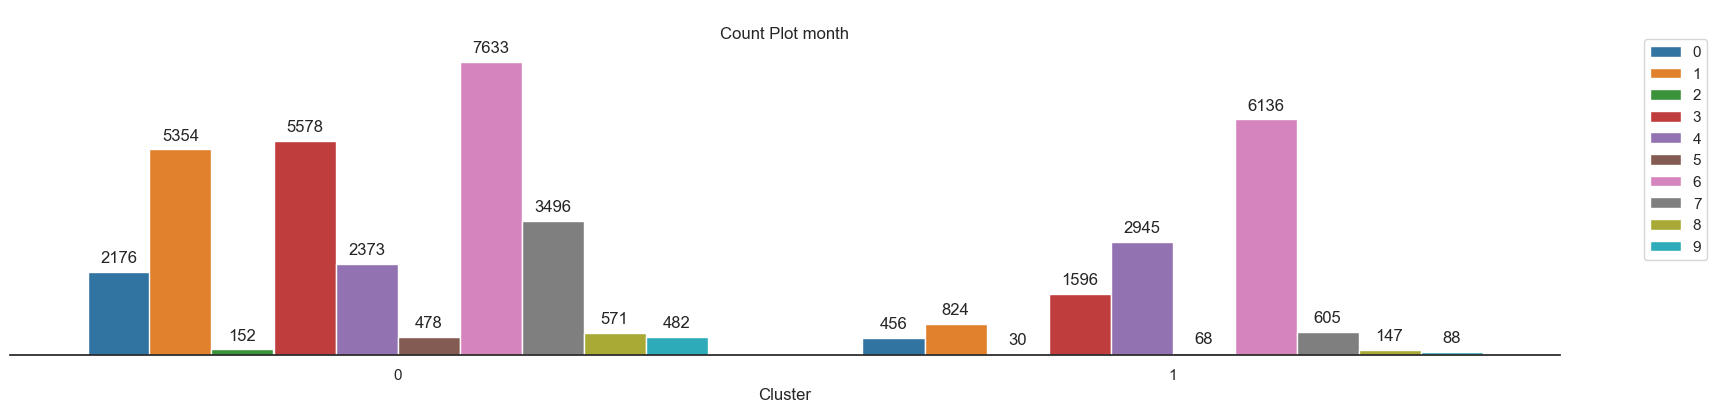

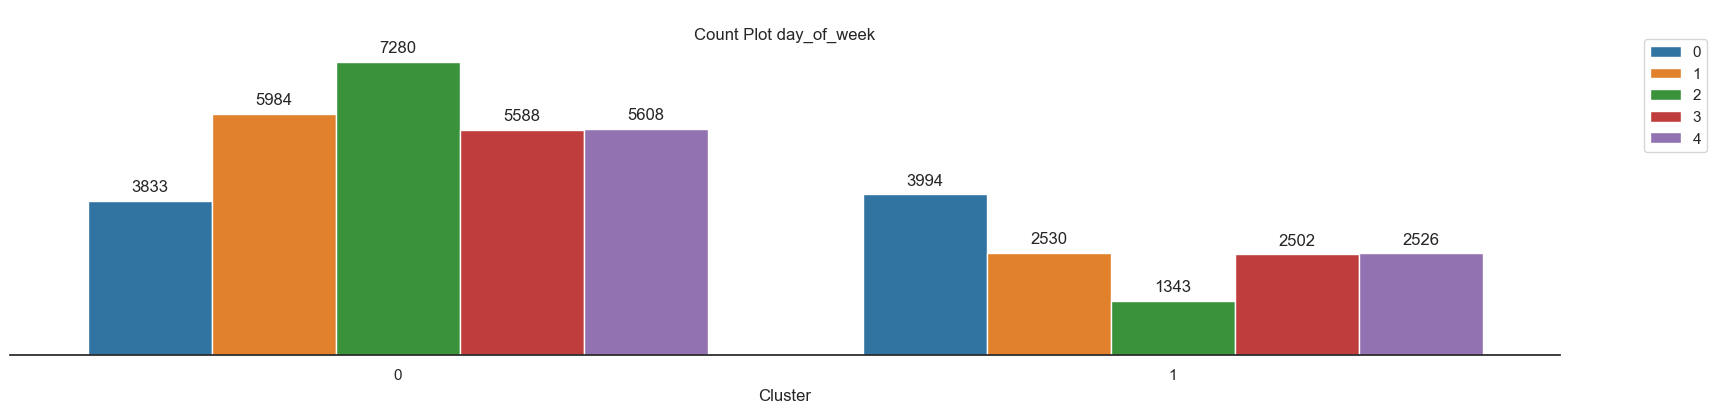

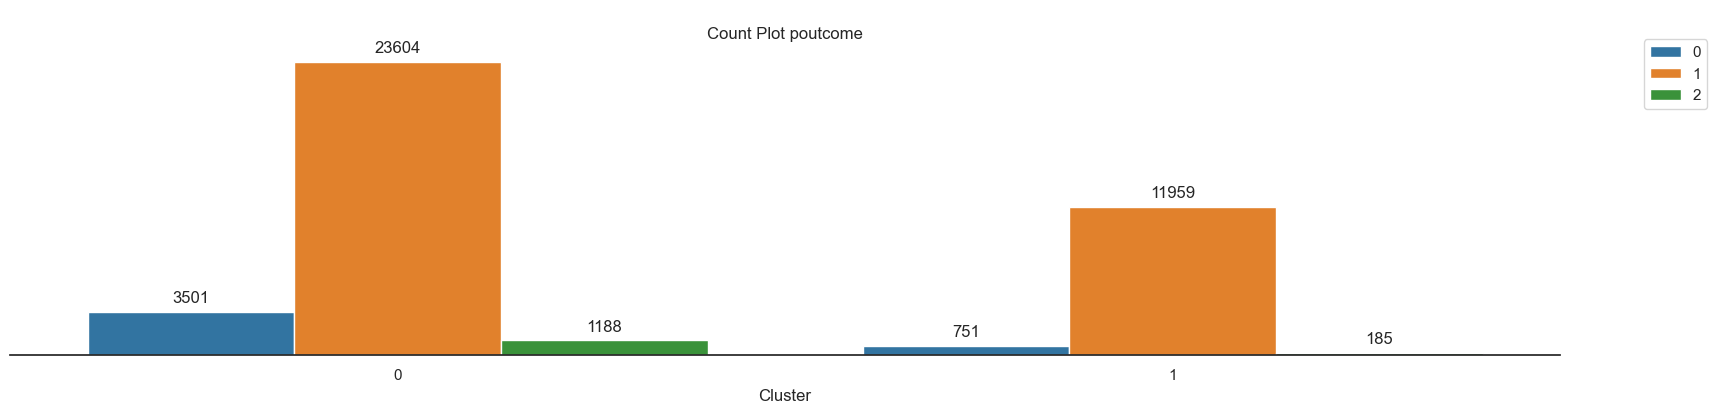

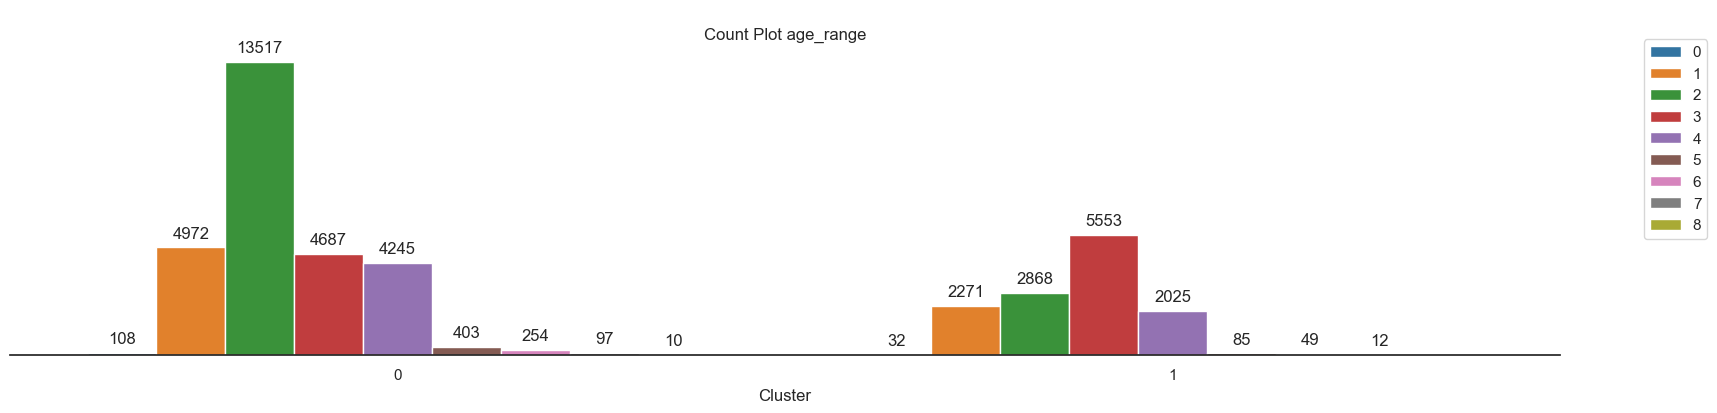

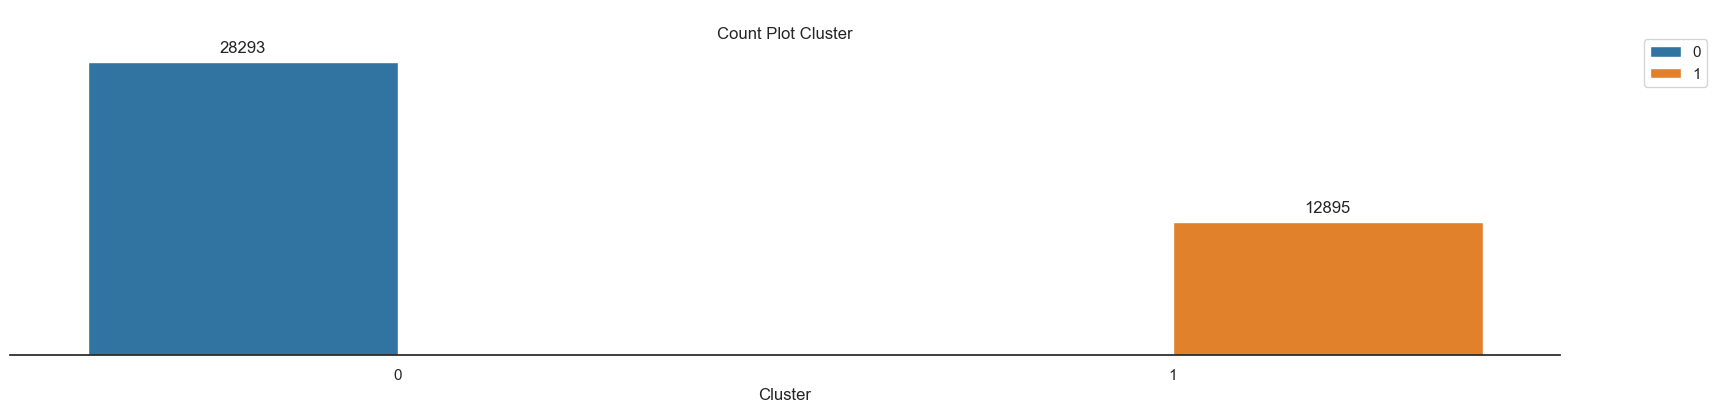

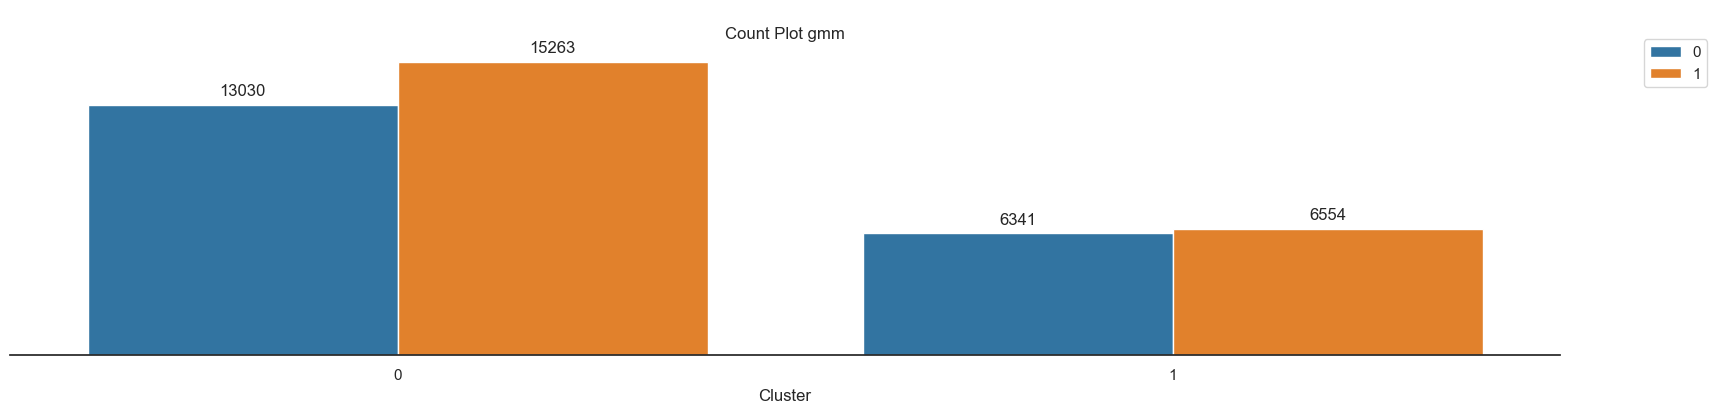

In [38]:
#kmodes graphs
for i in df_cluster.iloc[:,:-1]:
  plt.figure(figsize=(20,4))
  ax=sns.countplot(data=df_cluster, x='Cluster', hue=i)
  plt.title('\nCount Plot {}'.format(i), fontsize=12)
  ax.legend(loc='best')
  ax.legend(bbox_to_anchor=(1.1, 1.05))
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width()/2., p.get_height()),
    ha='center',
    va='center',
    xytext=(0,10),
    textcoords = 'offset points')
  sns.despine(right=True, top=True, left=True)
  ax.axes.yaxis.set_visible(False)
  plt.show()

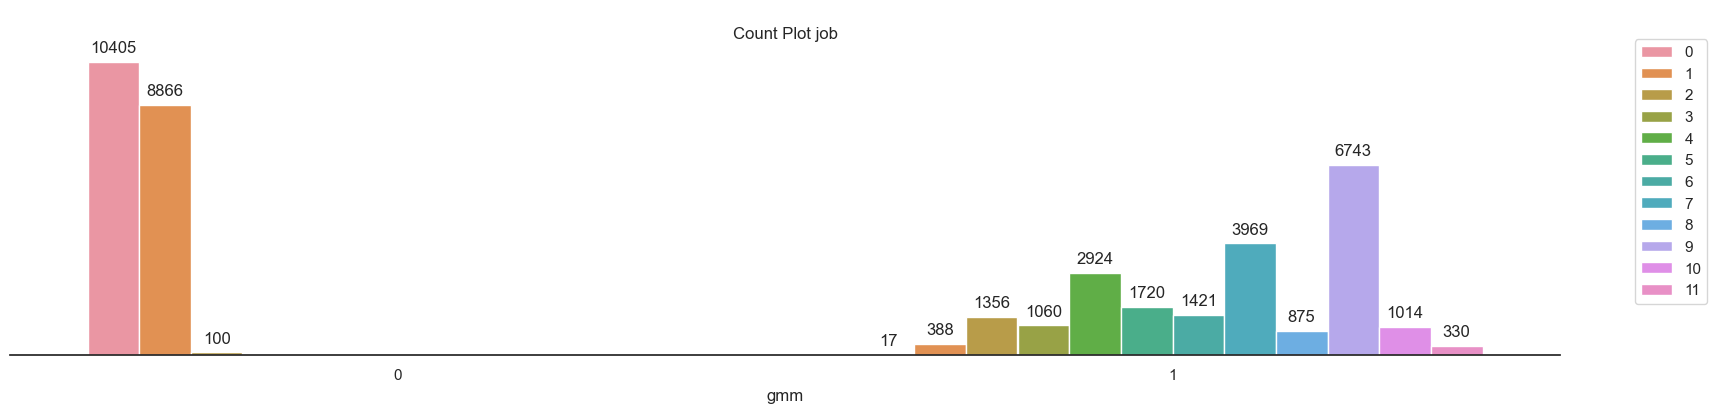

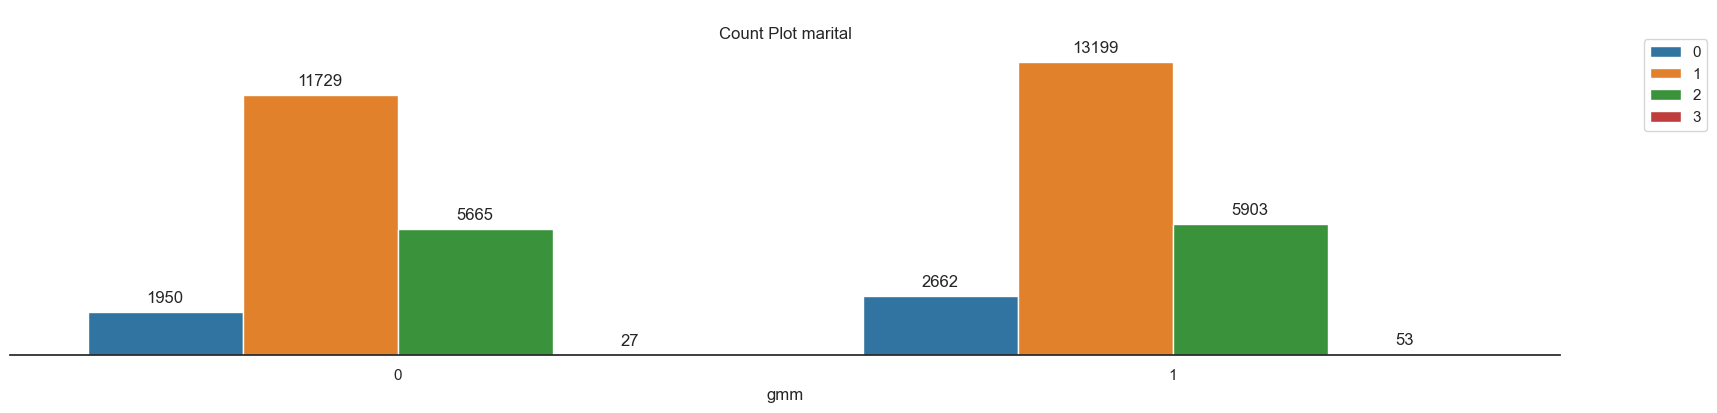

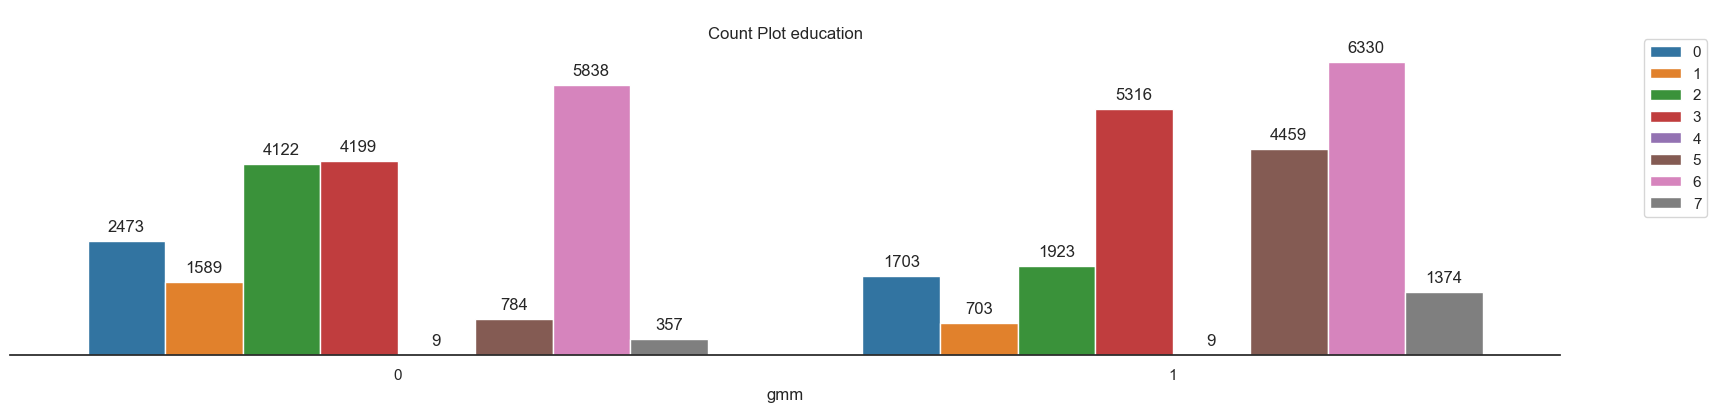

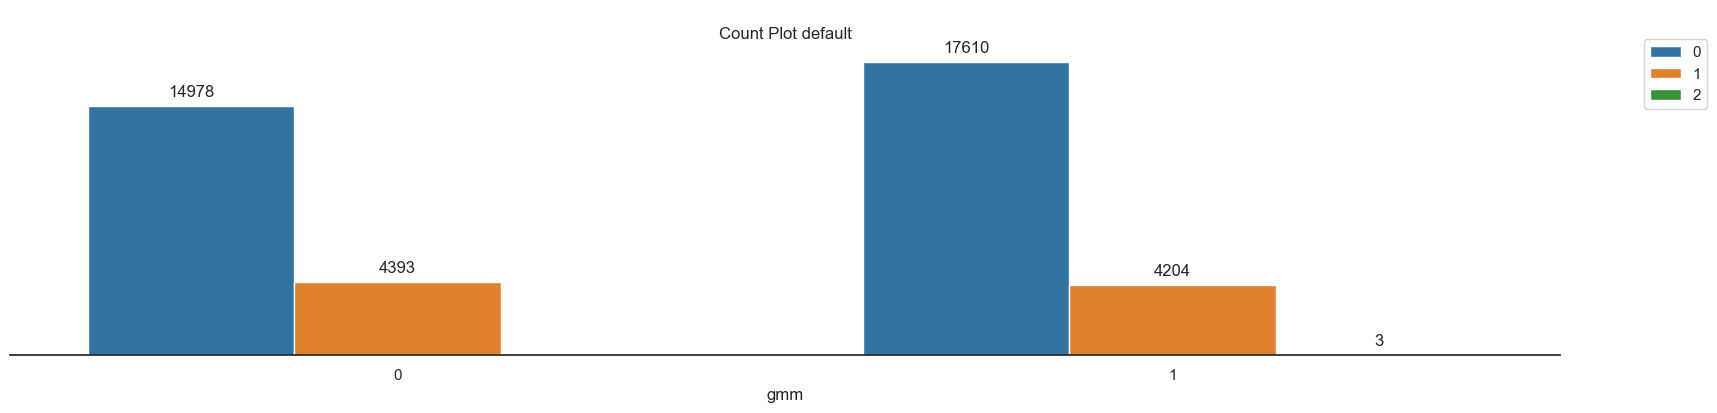

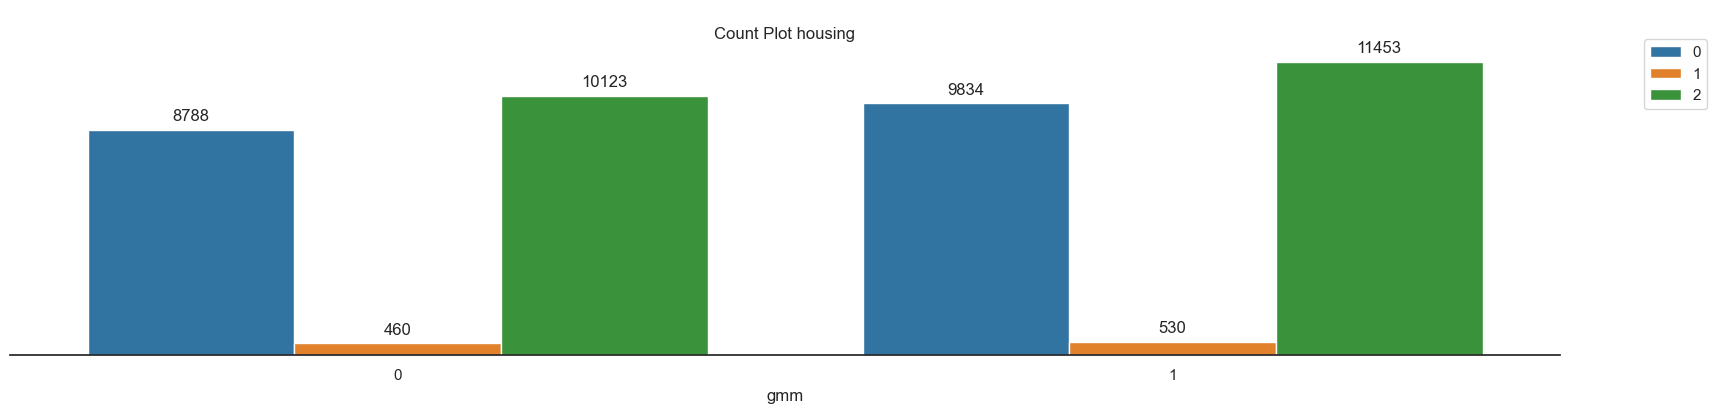

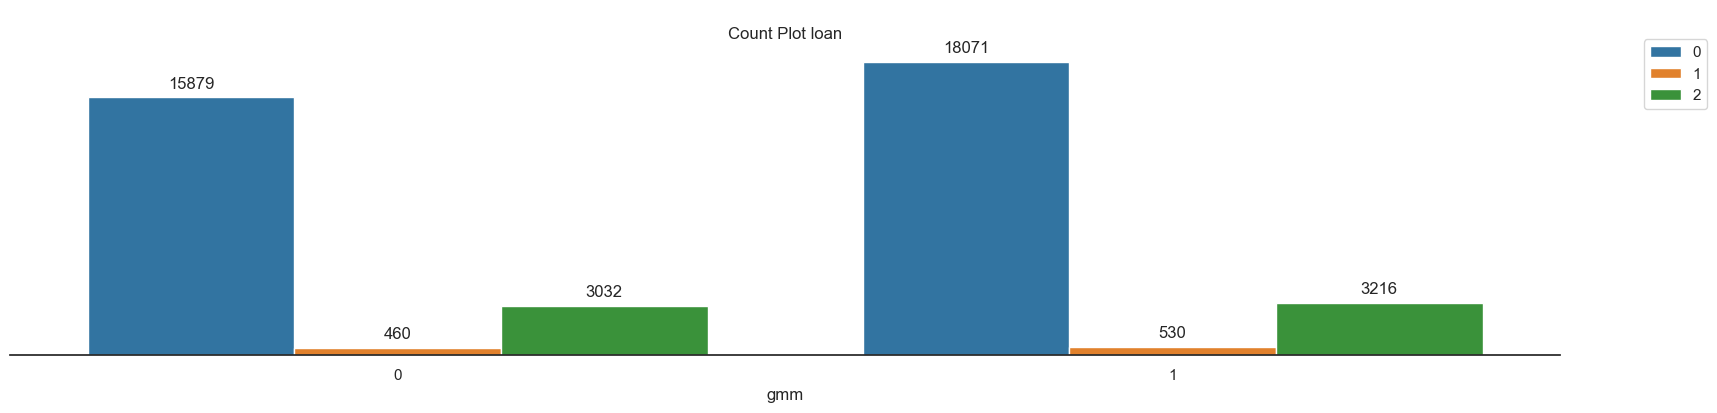

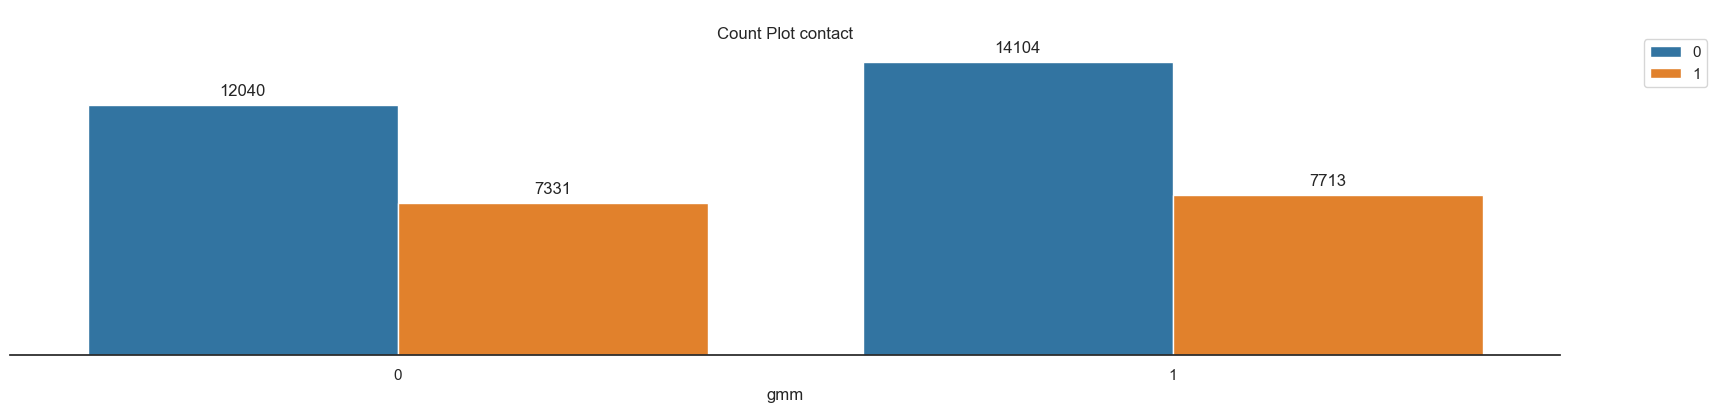

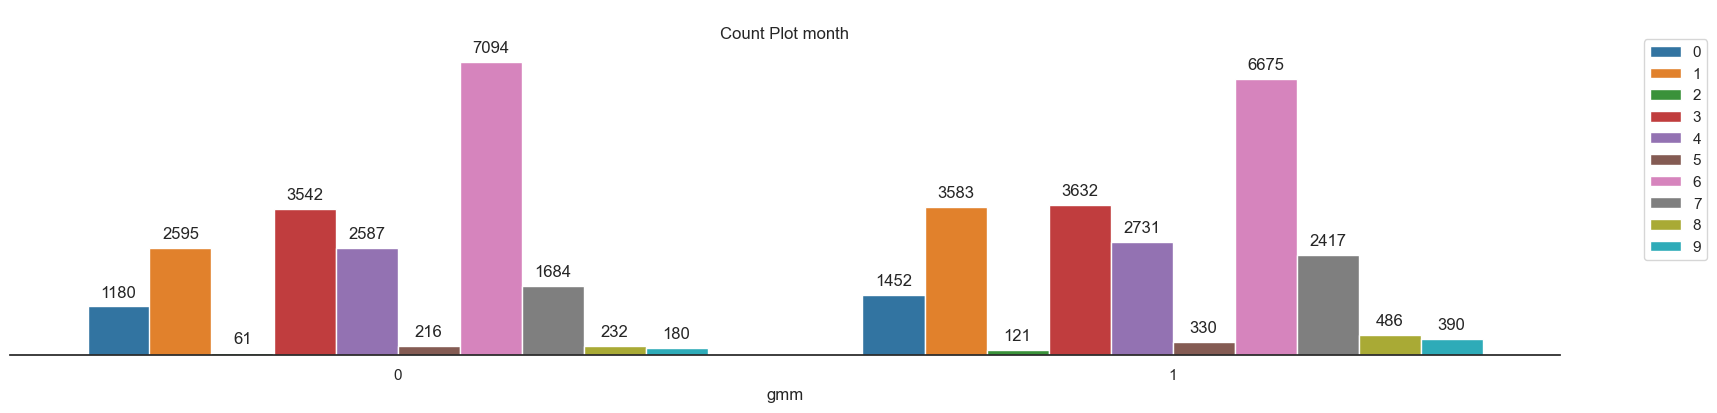

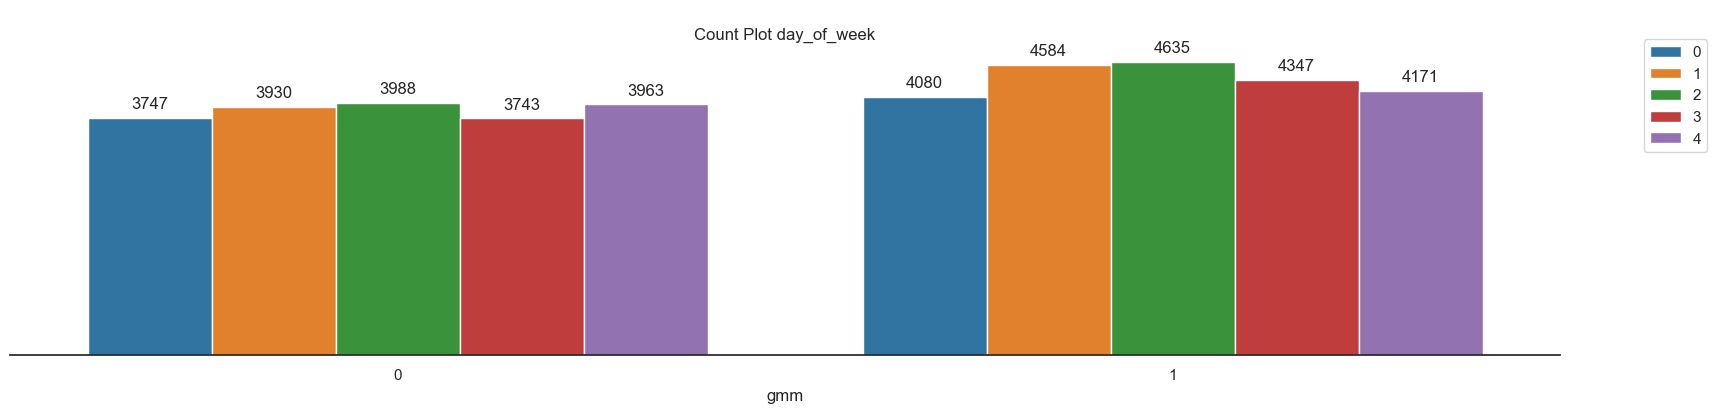

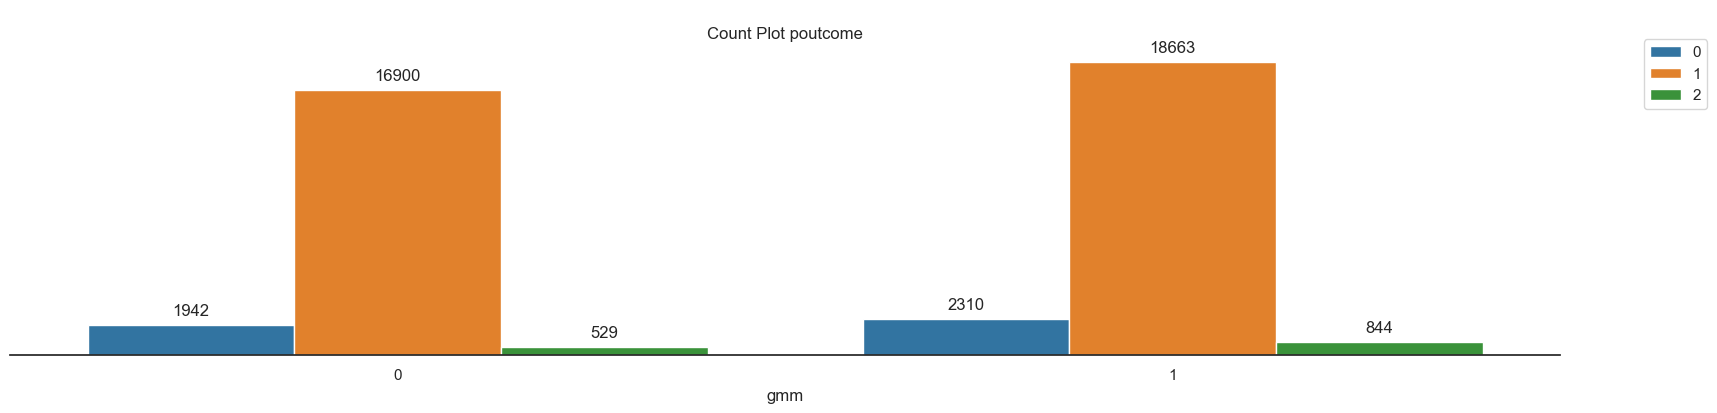

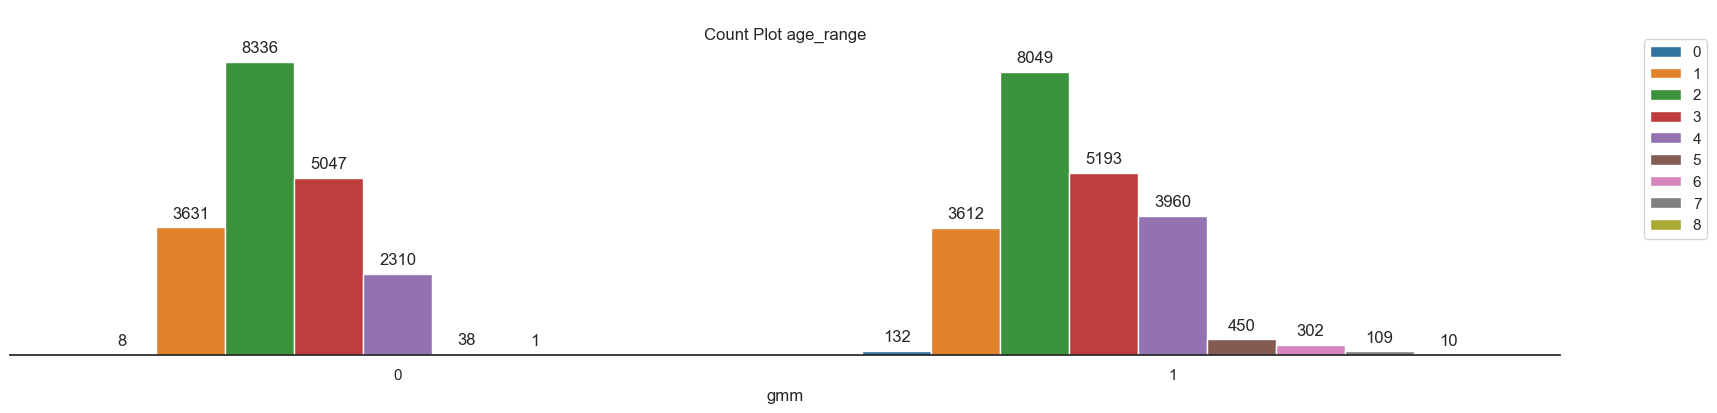

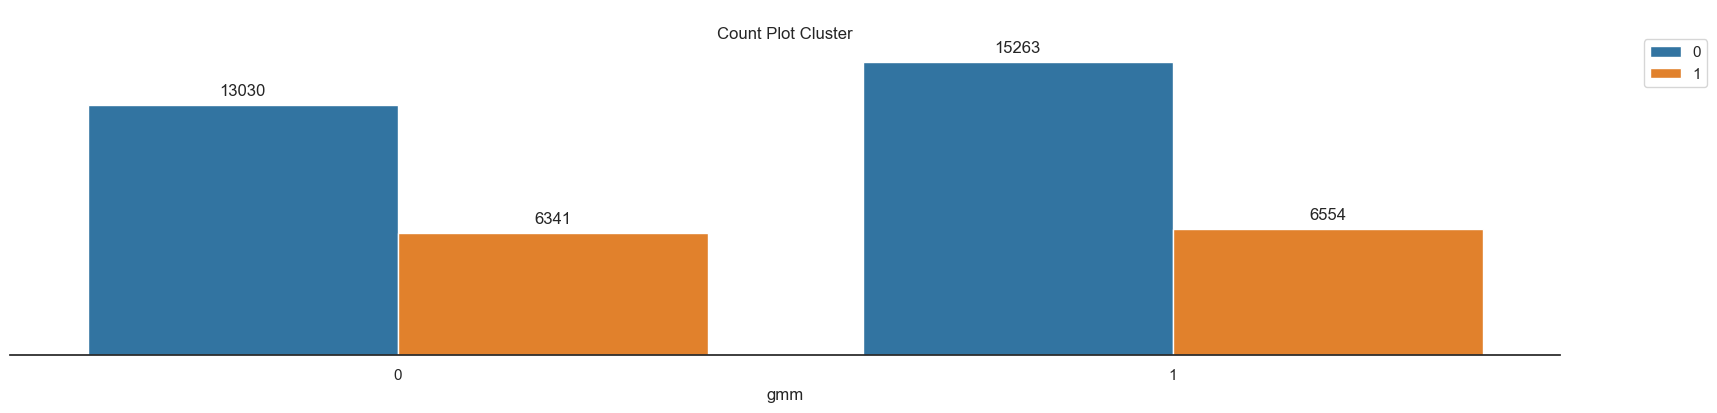

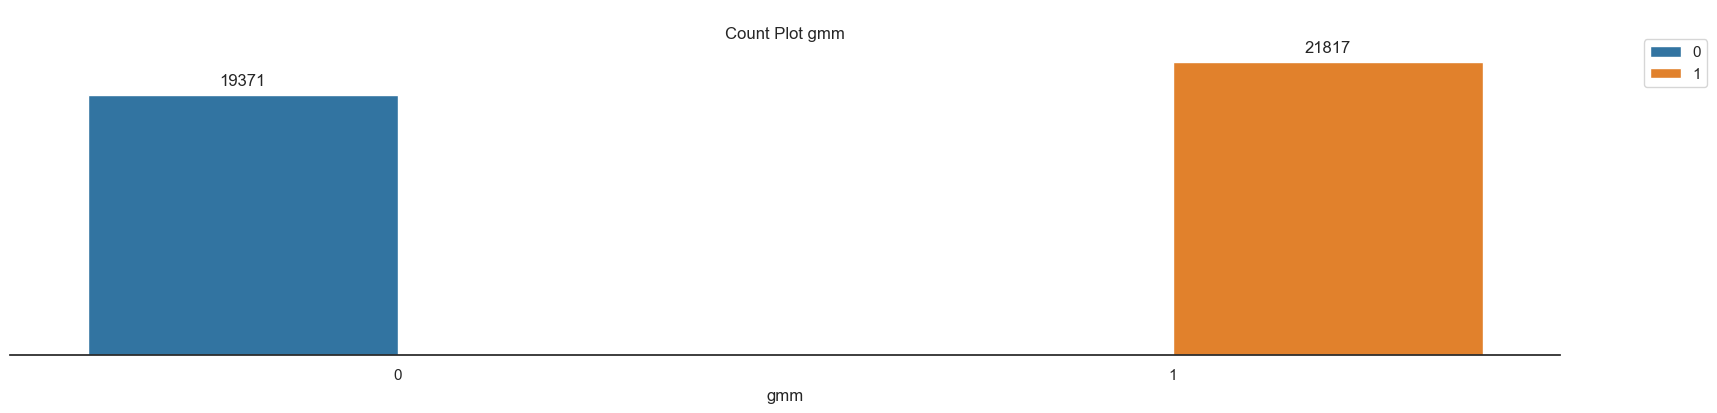

In [39]:
#gaussian mixture model graphs
for i in df_cluster.iloc[:,:-1]:
  plt.figure(figsize=(20,4))
  ax=sns.countplot(data=df_cluster, x='gmm', hue=i)
  plt.title('\nCount Plot {}'.format(i), fontsize=12)
  ax.legend(loc='best')
  ax.legend(bbox_to_anchor=(1.1, 1.05))
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width()/2., p.get_height()),
    ha='center',
    va='center',
    xytext=(0,10),
    textcoords = 'offset points')
  sns.despine(right=True, top=True, left=True)
  ax.axes.yaxis.set_visible(False)
  plt.show()

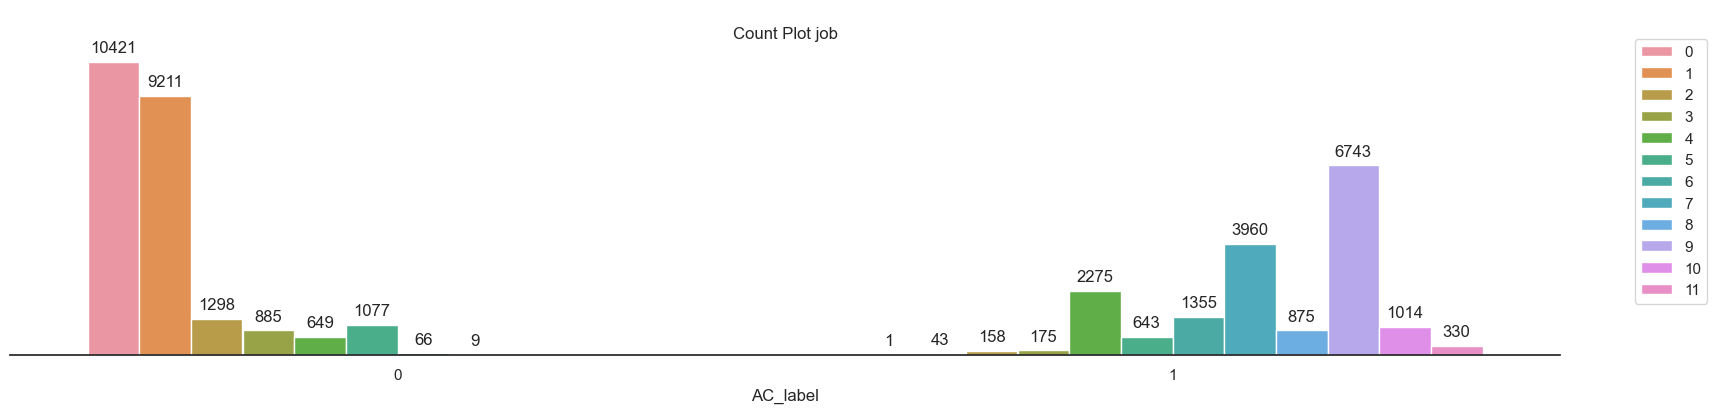

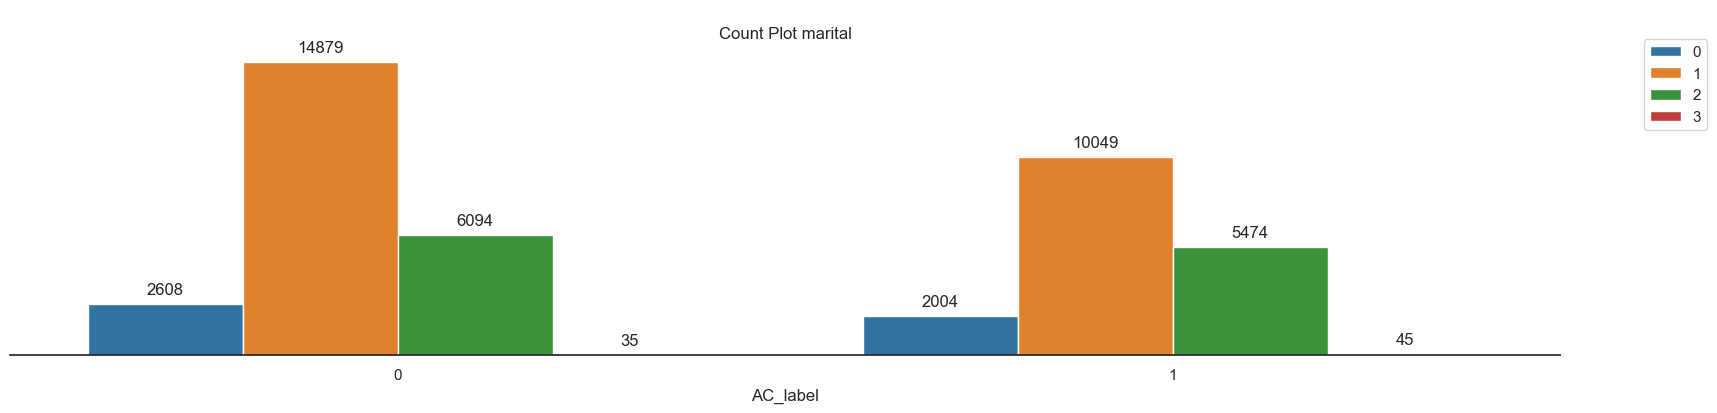

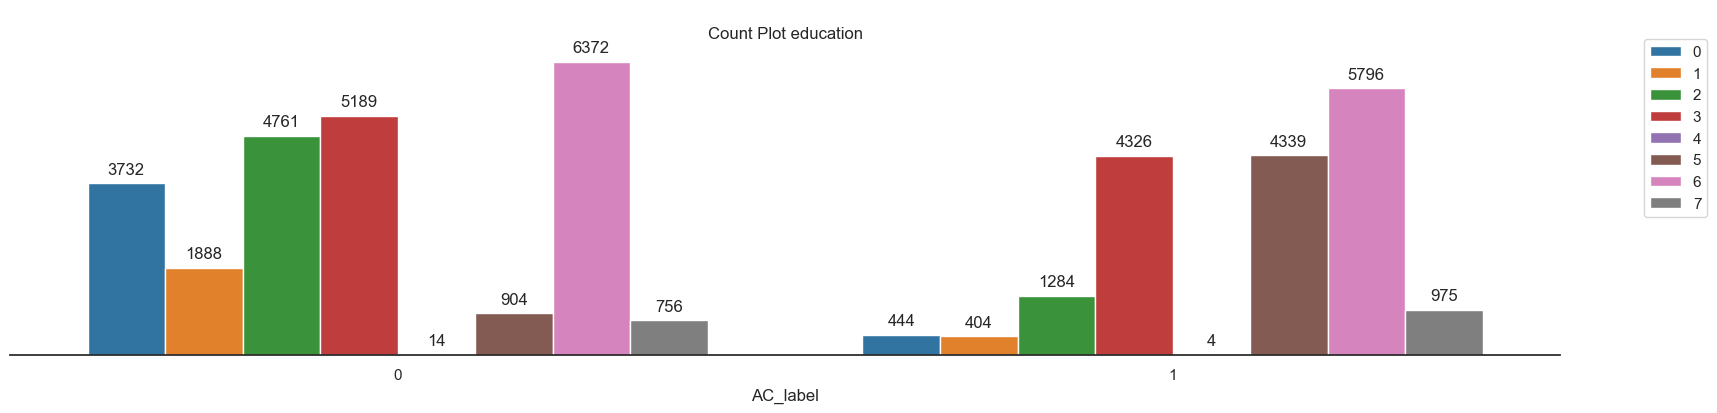

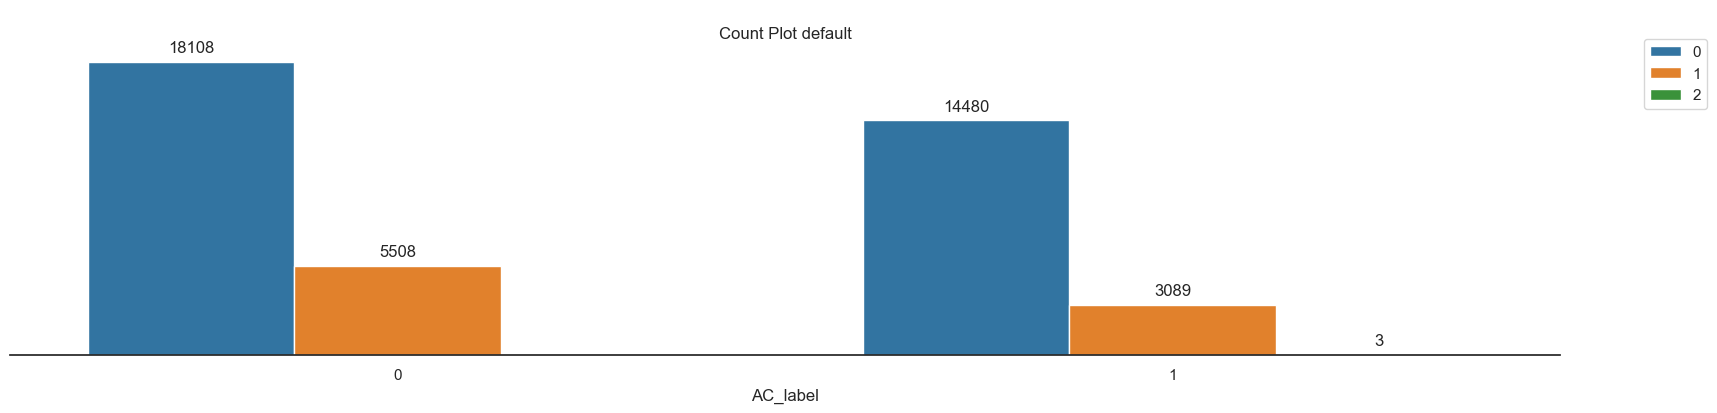

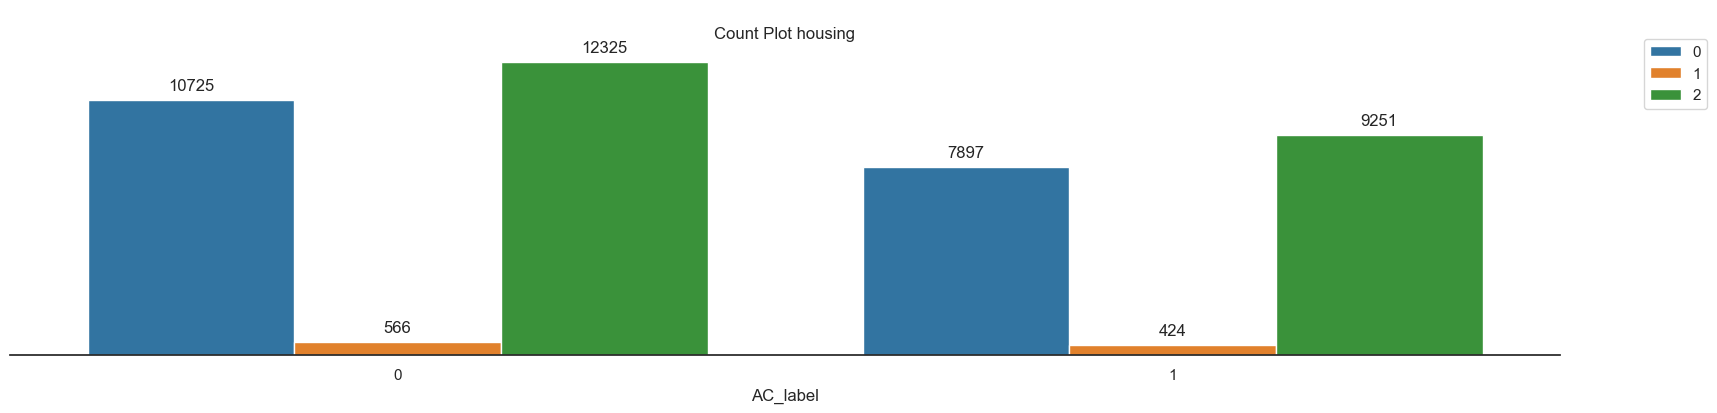

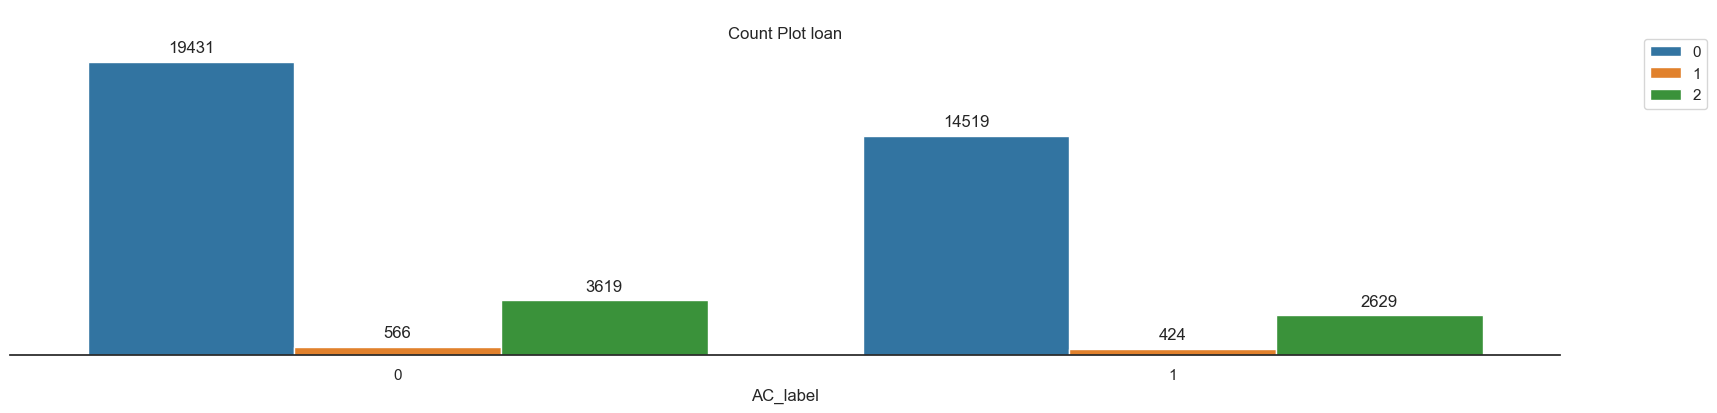

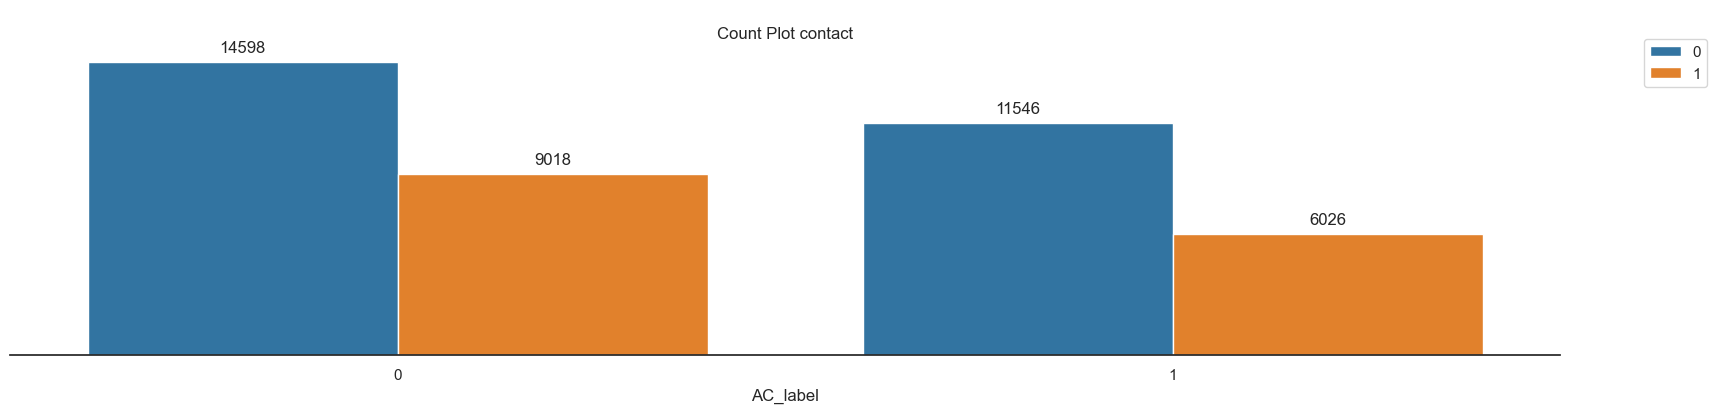

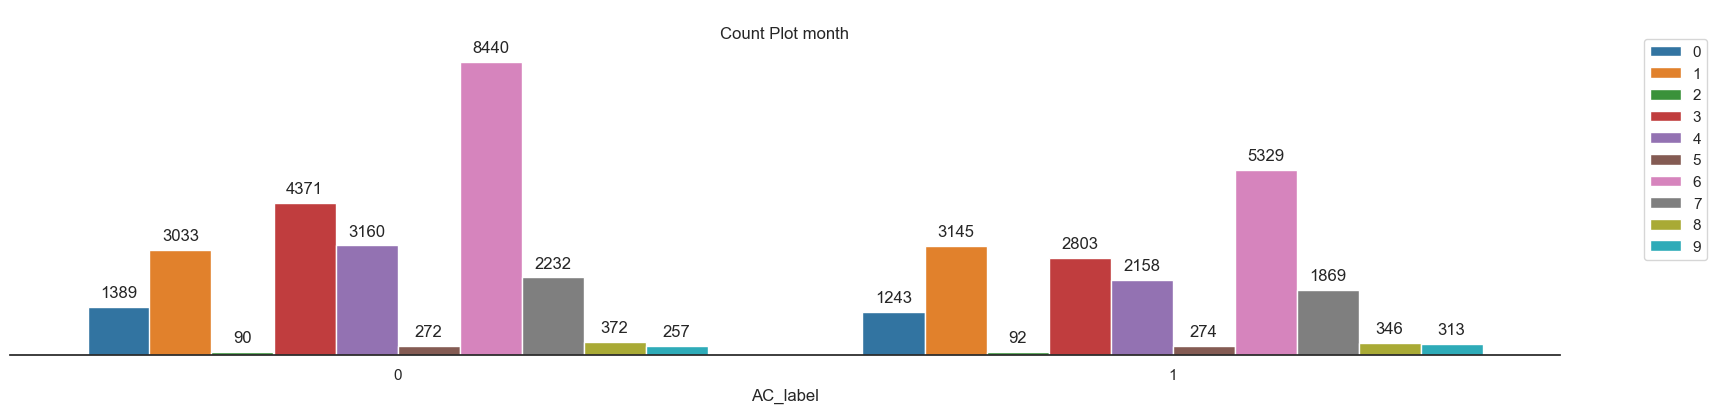

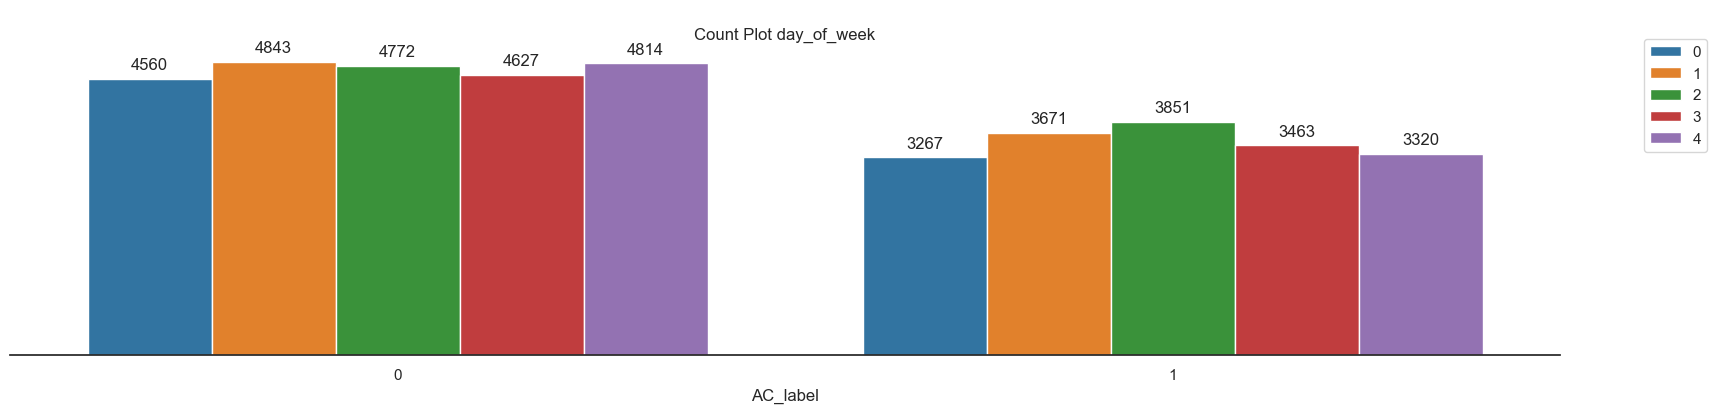

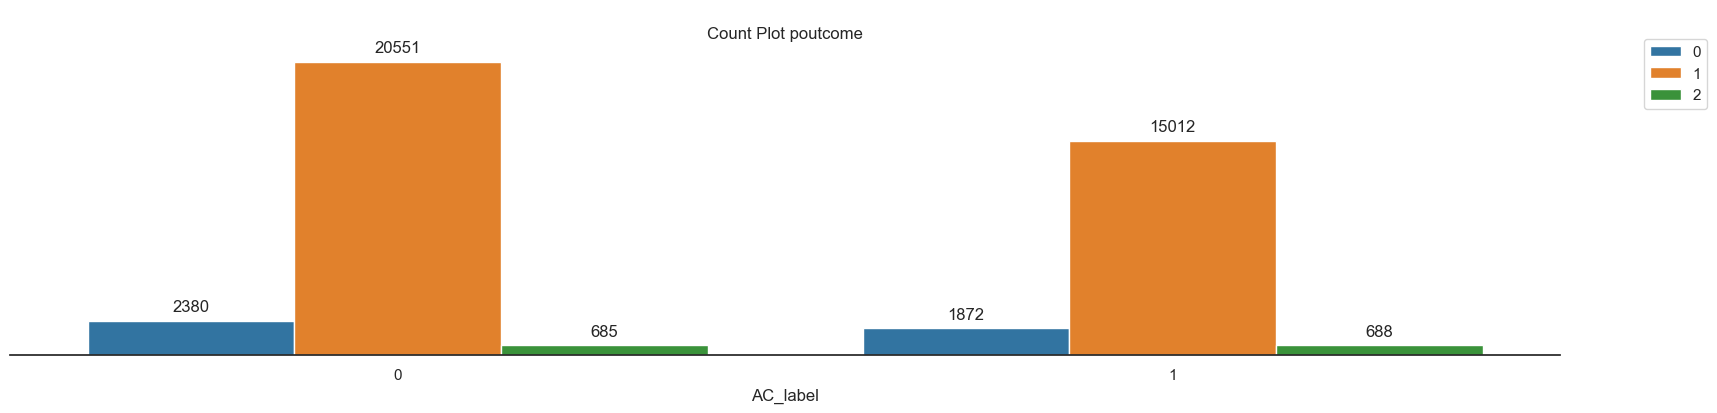

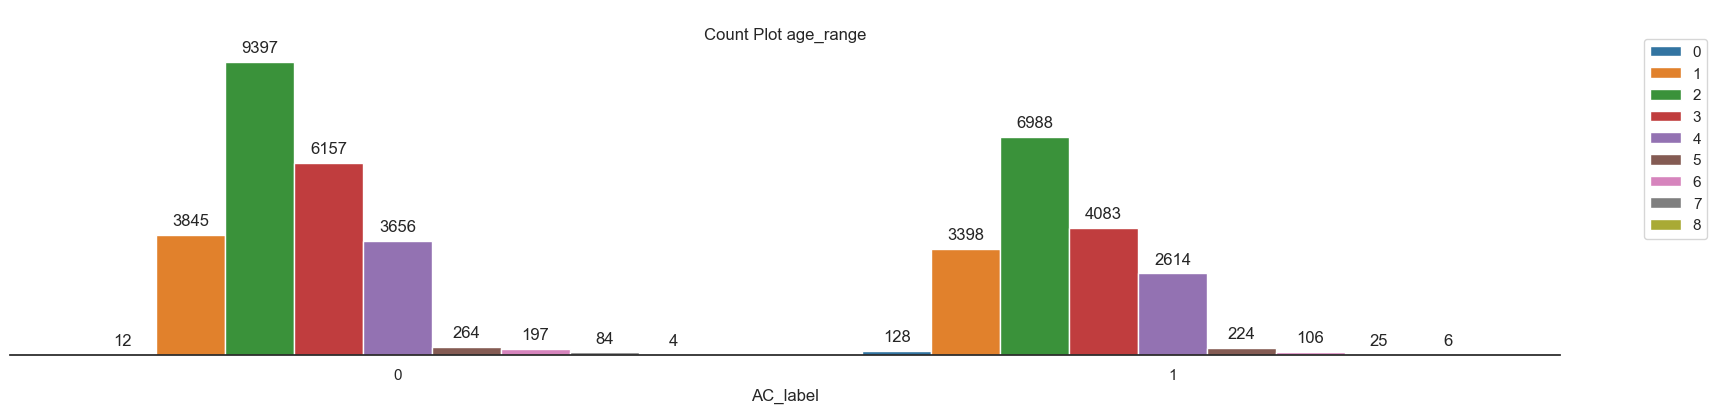

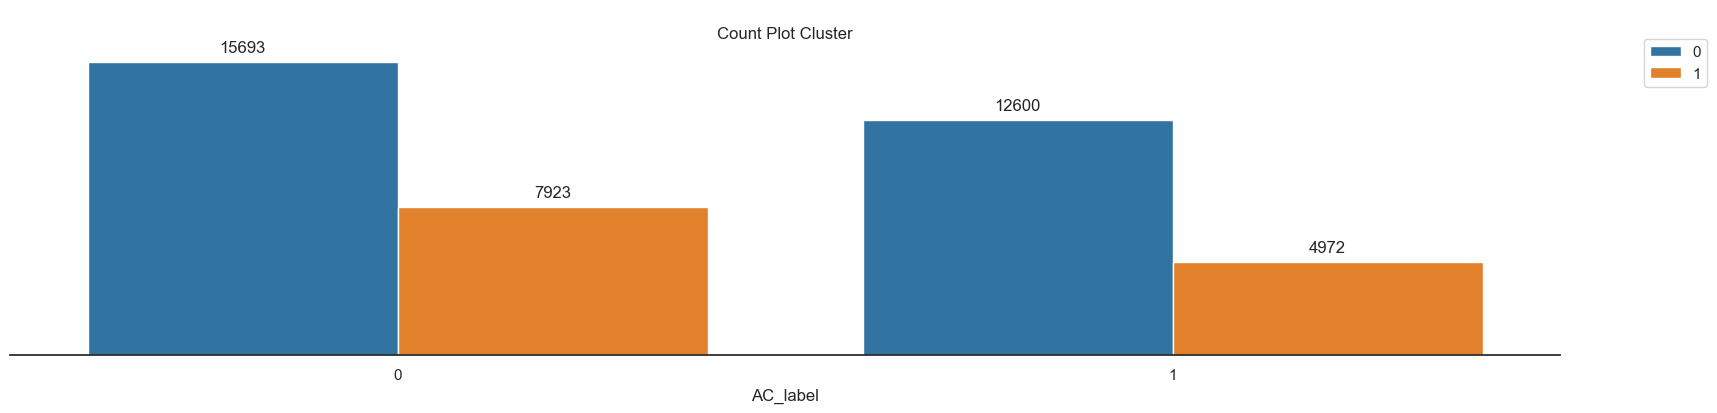

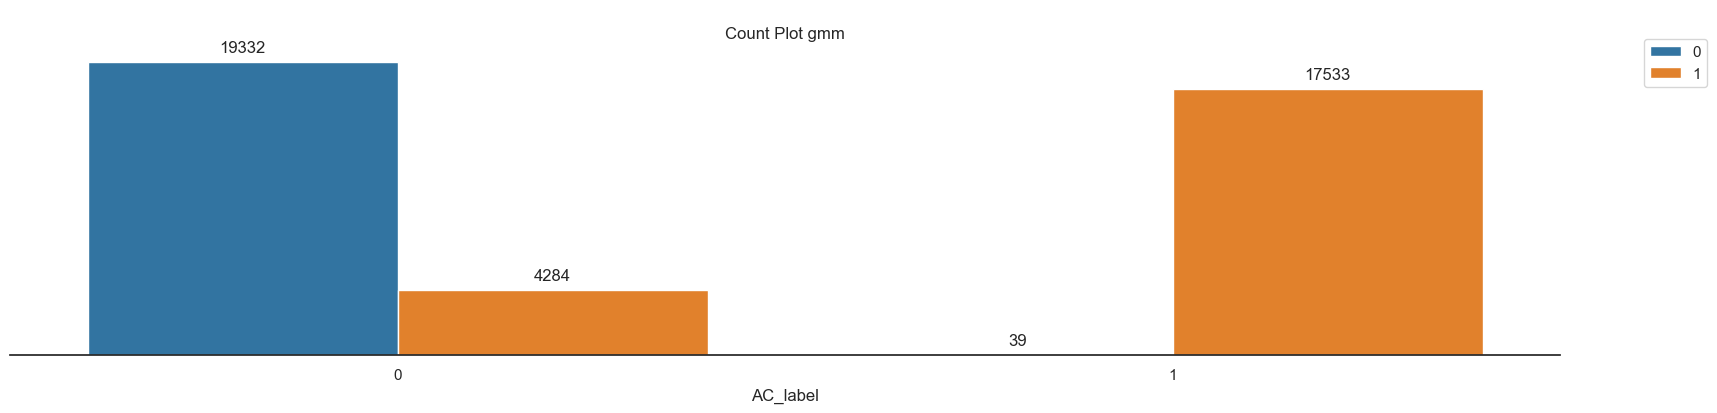

In [40]:
#hierarchial agglomerative graphs
for i in df_cluster.iloc[:,:-1]:
  plt.figure(figsize=(20,4))
  ax=sns.countplot(data=df_cluster, x='AC_label', hue=i)
  plt.title('\nCount Plot {}'.format(i), fontsize=12)
  ax.legend(loc='best')
  ax.legend(bbox_to_anchor=(1.1, 1.05))
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width()/2., p.get_height()),
    ha='center',
    va='center',
    xytext=(0,10),
    textcoords = 'offset points')
  sns.despine(right=True, top=True, left=True)
  ax.axes.yaxis.set_visible(False)
  plt.show()

In [41]:
a=df_cluster["gmm"]
b=df_cluster["AC_label"]
c=df_cluster["Cluster"] 

In [43]:
kmodes_silhouette = silhouette_score(df_cluster,c)
gmm_silhouette = silhouette_score(df_cluster,a)
agg_silhouette = silhouette_score(df_cluster,b)
print(kmodes_silhouette)
print(gmm_silhouette)
print(agg_silhouette)

0.030991930529592548
0.2986229900419253
0.3377658863344458


In [53]:
kmodes_davies = davies_bouldin_score(df_cluster,c)
gmm_davies = davies_bouldin_score(df_cluster,a)
agg_davies = davies_bouldin_score(df_cluster,b)
print(kmodes_davies)
print(gmm_davies)
print(agg_davies)

4.819753683168317
1.3264253576526281
1.2277909006830845


In [44]:
combined_clusters = []
for i in range(len(df_cluster)):
    cluster_votes = [a[i], b[i],c[i]]
    combined_cluster = max(set(cluster_votes), key = cluster_votes.count)
    combined_clusters.append(combined_cluster)

In [47]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
combined_silhouette = silhouette_score(df_cluster, combined_clusters)
combined_db = davies_bouldin_score(df_cluster, combined_clusters)
print(combined_silhouette)
print(combined_db)

0.3177226671220218
1.2877180644223571
